# Lab Session: Clustering

### Introduction and objectives

This lab session introduces techniques to cluster similar kind of data. Clustering is called an unsupervised machine learning technique since there is no truth value for the samples under consideration. It can be applied to any (telecommunications, textual, social media and multimedia) sort of data. In this lab session we'll learn how to perform basic clustering and then apply the same techniques to compress an image.

In this exercise we'll perform a particular type of clustering known as k-means clustering. We'll start with a simple 2D example to help you understand how k-means algorithm works. After this we'll use k-means algorithm to compress an image by reducing the number of colors to only the most common one in the image. The image data is non-trivial in the sense that it is 3D data. Thus the intuition gained in the experiment with 2D data will help us with the 3D data.

To complete the exercise please fill the ``<to fill>`` parts with correct code. You can also write the function docstrings for each of the functions defined below as a complementary exercise. This will help you in understanding the code better.

## Part 1 - k-Means clustering on 2D data

In this part of the exercise we understand k-Means clustering by programming it module by module and using it on a 2D dataset.

The cell below defines a helper function to load the dataset from a file into program memory.

In [1]:
def load_dataset(file_name):      #general function to parse tab -delimited floats
    """
    <docstring>
    :param file_name: the file containing data
    :return: a list of lists containing the data
    """
    data_mat = []                #assume last column is target value
    fr = open(file_name)
    for line in fr.readlines():
        cur_line = line.strip().split('\t')
        flat_line = map(float, cur_line) #map all elements to float()
        data_mat.append(flat_line)
    return data_mat

Load the dataset:

In [2]:
data_list = load_dataset('./testSet.txt')

Check the datatype of the variable data_list.

In [3]:
print(type(data_list))

<type 'list'>


Import the numpy library for python. Numpy supports a vast array of numerical manipulations and is best suited for developing machine learning algorithms.

There are libraries like scikit-learn for python which provide a large number of machine learning algorithms. However for this tutorial since we'll implement the k-Means clustering algorithm ourselves, numpy fits our case very well.

In [4]:
import numpy as np

Numpy works with ndarrays. It a datatype best suited for numerical calculations. Thus we convert our list of data into a numpy array. 

You can read more about numpy array's here: https://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.ndarray.html

In [5]:
data_mat = np.array(data_list, dtype=np.float64)

Since, data_mat is an array now, find out about the size of it. How many samples and variables do we have and what are the dimensions of this array?

In [6]:
print(type(data_mat))
print(data_mat.size)
print(data_mat.ndim)

<type 'numpy.ndarray'>
160
2


#### Let's visualize the data
To visualize the data, we'll draw a scatter plot for the data. Scatter plots are good when we want to have an understanding of the spatial distribution of datapoints. Since the problem that we are trying to solve here is a clustering one, spatial arrangement of 2D data can give us interesting clues about the data.

Understanding the data is one of the most important parts of any machine learning solution. We must always visualize our data and get as much information about it as possible before deciding the future course of action regarding any possible machine learning solution.

One of the most popular libraries for visualization in python is matplotlib. We'll use that here.

<IPython.core.display.Javascript object>


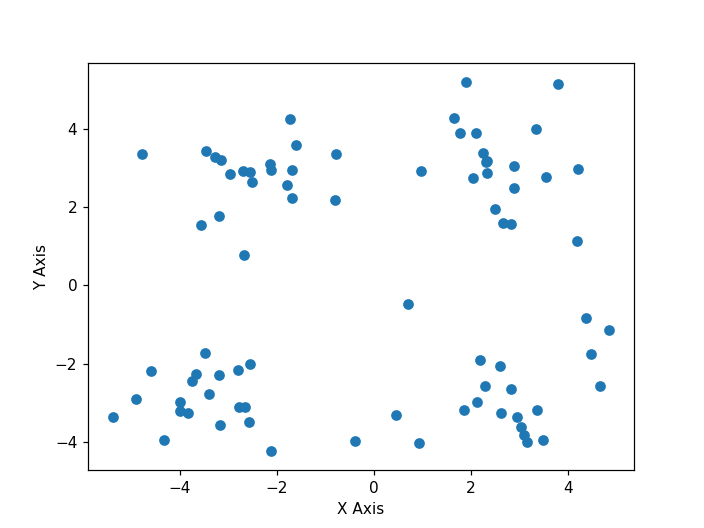

In [37]:
# provides the interactivity on the images by loading the plot as a javascript object.
%matplotlib nbagg

import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(data_mat[:, 0], data_mat[:, 1])
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')

plt.show()

###### Please switch off the interactivity of the previous graph before moving forward.

## k-Means Clustering

For a given x number of samples, k-Means algorithm assigns them to k number of clusters. The algorithm is an iterative procedure. It starts by randomly creating k centroids. Centroids are considered the "centers" of the k clusters. 

> Then it assigns all of the x samples to the k centroids. 

> After this it recalculates the centroids by calculating the average of the samples assigned to each of the k centroids.

The algorithm always converges. However this convergence depends on the intial random choice of centroids and thus the converged solution may not always be optimal.

[//]: # "The above two steps are repeated untill a stopping criteria. For simplification purposes we'll put a hard limit on the number of iterations for the two above steps."

In the next steps, we'll define functions that cater to the different objectives mentioned above.

### Initializing random centroids

There are many different ways to initiate the centroids. A straighforward one is to randomly choose the requested number of centroids from the provided data.

The function below is designed to fulfill that goal. Please complete the function by replacing ``<to fill>`` with the correct code.

In [8]:
from random import shuffle

In [9]:
def init_centroids(data_mat, num_centroids):
    """
    <docstring>
    :param data_mat: the data matrix or array
    :param num_centroids: the number of centroids to initialize
    :return: desired number of initial centroids with the same dimensions 
    """
    shape_data_mat = data_mat.shape
    centroids = np.zeros((num_centroids, shape_data_mat[1]))
    ids = [x for x in range(shape_data_mat[0])]
    shuffle(ids)
    centroids = data_mat[ids[0:num_centroids]] #Hint: This line uses location based indexing to select the desired initial centroids from original data.
    print("centroids:")
    print(centroids)
    return centroids

Let's compute the initial set of 4 centroids for our dataset.

Why four?

Please fill in the answer below:

Visually we see 4 groups. We learned to look at what we have and make decisions based on common sense.

Also write the correct function call in the code below.

In [10]:
primary_centroids = init_centroids(data_mat, 4)

centroids:
[[ 3.165506 -3.999838]
 [-2.786837 -3.099354]
 [ 0.704199 -0.479481]
 [-2.513661  2.642162]]


Let's have a look at our initial set of centroids.

In [11]:
import pprint
pprint.pprint(primary_centroids)

array([[ 3.165506, -3.999838],
       [-2.786837, -3.099354],
       [ 0.704199, -0.479481],
       [-2.513661,  2.642162]])


###### Are these centoids assigned properly?

The next step is to assign our 80 samples to these 4 centroids thus creating 4 clusters. To this purpose, let's define the function to assign samples of a dataset to a set of centroids. Note that the dataset and centroids must have same dimensions.

The function defined below does that. It takes in the data matrix and the centroids and returns another numpy array containing the centroid id assignment (cluster number) for each sample.

In [12]:
import math
def assign_centroid(data_mat, centroids):
    """
    <docstring>
    :param data_mat: the data matrix
    :param centroids: the centroids
    :return: a numpy array that assigns a centroid id to each sample
    """
    
    #filled in
    num_centroids = centroids.shape[0]
    shape_data_mat = data_mat.shape

    idx = np.zeros((shape_data_mat[0], 1))
    
    # for each sample in the data
    for sample_index in range(idx.shape[0]):
        #filled in
        sample = data_mat[sample_index]
        least_dist = float('inf')
        
        # for each centroid
        for centroid_id in range(num_centroids):
            centroid = centroids[centroid_id]
            # get the euclidean distance between the centroid and sample
            squared_distance = 0
            for i in range(2):
                #print(str(sample) + " - " + str(sample[i]))
                squared_distance += (sample[i] - centroid[i])**2
            dist = math.sqrt(squared_distance)
            #Assign the centroid to the sample if it is the closest one
            if dist < least_dist:
                least_dist = dist
                idx[sample_index] = centroid_id
    return idx

Let's assign our primary centroids to all of the samples in the data.

In [13]:
idx_sample = assign_centroid(data_mat, primary_centroids)

Let's see the assignment to each sample in the data.

In [14]:
print(idx_sample)

[[3.]
 [3.]
 [0.]
 [1.]
 [2.]
 [3.]
 [0.]
 [1.]
 [2.]
 [3.]
 [0.]
 [1.]
 [2.]
 [3.]
 [2.]
 [1.]
 [2.]
 [3.]
 [0.]
 [1.]
 [2.]
 [3.]
 [2.]
 [1.]
 [3.]
 [3.]
 [0.]
 [1.]
 [2.]
 [3.]
 [0.]
 [1.]
 [2.]
 [3.]
 [0.]
 [1.]
 [3.]
 [3.]
 [0.]
 [1.]
 [2.]
 [3.]
 [0.]
 [1.]
 [2.]
 [3.]
 [0.]
 [1.]
 [2.]
 [3.]
 [0.]
 [1.]
 [2.]
 [3.]
 [0.]
 [1.]
 [2.]
 [3.]
 [0.]
 [1.]
 [2.]
 [3.]
 [0.]
 [1.]
 [2.]
 [3.]
 [0.]
 [1.]
 [2.]
 [3.]
 [0.]
 [1.]
 [2.]
 [3.]
 [0.]
 [1.]
 [2.]
 [3.]
 [0.]
 [1.]]


The next step of the process as mentioned above is to recompute the centroids from this assignment.

The centroids are computed as the average of the samples that currently belong to the cluster for each centroid. This provides us with the next set of centroids.

The function defined below achieves that goal.

In [15]:
def compute_centroids(data_mat, sample_idx, num_centroids):
    """
    <docstring>
    :param data_mat: the data matrix
    :param sample_idx: assignment of clusters to each sample in the data
    :param num_centroids: number of centroids
    :return: the new centroids by computing the means of the samples assigned to each centroid
    """

    shape_data_mat = data_mat.shape
    centroids = np.zeros((num_centroids, shape_data_mat[1]))

    for centroid_id in range(num_centroids):
        sample_indices = np.where(sample_idx == centroid_id) # np.where always return a tuple where the first element is the array of indices
        centroids[centroid_id, :] = np.true_divide(np.sum(data_mat[sample_indices[0], :], axis=0), len(sample_indices[0]))

    return centroids

Let's print the new centroids and see if they are different from the old ones or not. :D

In [16]:
print("Old centroids: ")
pprint.pprint(primary_centroids)
centroids_sample = compute_centroids(data_mat, idx_sample, 4)
print("New centroids: ")
pprint.pprint(centroids_sample)

Old centroids: 
array([[ 3.165506, -3.999838],
       [-2.786837, -3.099354],
       [ 0.704199, -0.479481],
       [-2.513661,  2.642162]])
New centroids: 
array([[ 2.95357317, -2.90248839],
       [-3.38237045, -2.9473363 ],
       [ 2.63677658,  2.44377547],
       [-1.90890087,  3.00451648]])


Do they change or not?

In the following step we put together the two functions defined above to define the k-Means algorithm as described in the beginning of the exercise.

Please ``<fill in>`` the correct code. 

In [17]:
def kmeans(data_mat, prim_centroids, max_iterations, plot_iterations=False):
    """
    <docstring>
    :param data_mat: the data matrix
    :param prim_centroids: centroids
    :param max_iterations: maximum number of iterations
    :plot_iterations: Boolean variable which controls whether to plot the cluster assignments on each oteration or not. Works only for 2D data.
    :return: numpy array of the final centroids and another numpy array containig the cluster id for each sample.
    """

    shape_prim_centroids = prim_centroids.shape
    shape_data_mat = data_mat.shape
    num_centroids = shape_prim_centroids[0]
    centroids = prim_centroids
    idx = np.zeros((shape_data_mat[0], 1))
    fig = plt.figure()
    ax = fig.add_subplot(111)

    for i in range(max_iterations):
        print('kmeans iteration ', i+1, 'of', max_iterations)
        
        idx = assign_centroid(data_mat, centroids)
        centroids = compute_centroids(data_mat, idx, num_centroids)
        
        # plot progress
        if plot_iterations:
            ax.scatter(data_mat[:, 0], data_mat[:, 1])
            ax.scatter(centroids[:,0], centroids[:,1], marker='+', s=100)
            fig.canvas.draw()
            var_continue = raw_input('Press enter to continue.')
            plt.cla()
        #print('Centroids are: ', centroids)

    return centroids, idx

Let's execute the kmeans algorithm for 5 iterations.

In [18]:
maximux_iterations = 5

<IPython.core.display.Javascript object>


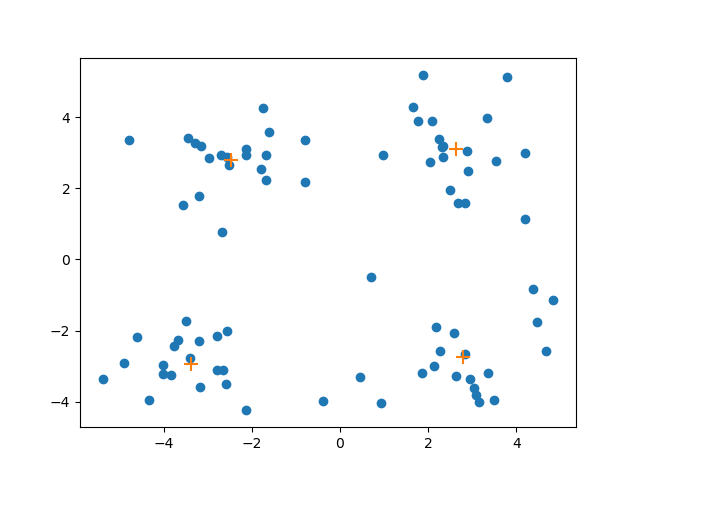

('kmeans iteration ', 1, 'of', 5)
Press enter to continue.
('kmeans iteration ', 2, 'of', 5)
Press enter to continue.
('kmeans iteration ', 3, 'of', 5)
Press enter to continue.
('kmeans iteration ', 4, 'of', 5)
Press enter to continue.
('kmeans iteration ', 5, 'of', 5)
Press enter to continue.


In [19]:
centroids, idx = kmeans(data_mat, primary_centroids, maximux_iterations, plot_iterations=True)

Notice something interesting about the plot/output? How come?

Now, Lets visualize the final locations of these clusters.

<IPython.core.display.Javascript object>


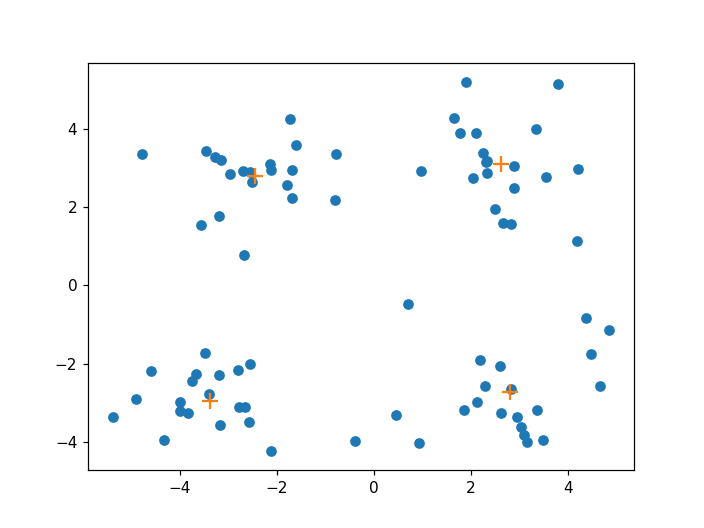

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(data_mat[:, 0], data_mat[:, 1])
ax.scatter(centroids[:,0], centroids[:,1], marker='+', s=100)
fig.canvas.draw()
plt.show()

###### HW: Try running the algorithm with a counter-intuitive number of 3 clusters. Compare the two runs.
I saw that the centroids seem harder to find since they jump around more.

## Part 2 - k-Means Clustering on image Pixels for image compression

In this part of the exercise we'll use the k-Means algorithm defined in the previous section of this lab session to compress an image.

The original image is 128`*`128. In the image each pixel is represented by 3 RGB values where each of these values is represented by an 8 bit unsigned integer (0 - 255). These values define the intensity of Red, Green and Blue color respectively at any pixel. As a result of this each image has thousands of colors. These thousands of colors can be seen as centroids in their own capacity. In this part of the exercise we utilize the just learned k-Means clustering technique to reduce the number of colors or clusters from thousands to let's say 16. 

By doing this we do not need to store the thousands of RGB values for each color. Instead now we only need to store the RGB values for these 16 colors and the centroid(color) number to which each of the pixel in the image belong.

##### How clustering helps in image compression

The original image need 8`*`3 bits for each one of the 128`*`128 pixels. This translates into 393,216 bits for the image. After the clustering we only store the 16 centroids, i.e. 16`*`24 bits and 4 bits (one integer cluster id index) for each pixel in the image, i.e. 128`*`128`*`4 bits. This translates in to just 65,920 bits for the whole image. Thus the image is reduced to 16.76% of it's original size.

We read the image into the program memory using imread function from matplotlib library.

In [22]:
import matplotlib.image as mpimg

In [23]:
img_data_orig = mpimg.imread('./bird_small.png')

Write the code below to get the dimensions of the matrix which is the output of the imread function.

In [24]:
print(img_data_orig.ndim)

3


What do the each one of these 3 dimensions represent? R G B

Let's plot the image from the 3D matrix ``img_data_orig``

In [25]:
img_plot = plt.imshow(img_data_orig)
plt.show()

Now, as always the first step for any machine learning based data analysis procedure, let's visualize the data.

Since the data we are dealing with now is 3D, we plot a 3D scatter plot. The code block below accomplishes that.

In [26]:
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


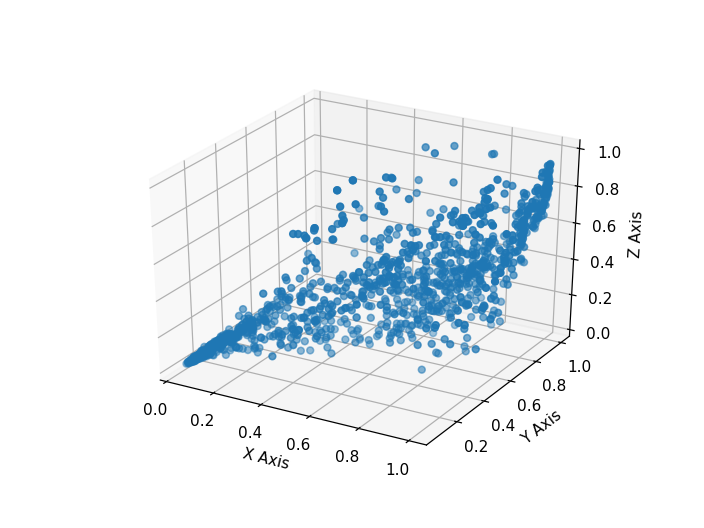

In [27]:
# Display the clusters from the original image
x_r = img_data_orig[:, :, 0]  # red values as x-axis
y_g = img_data_orig[:, :, 1]  # green values as y-axis
z_b = img_data_orig[:, :, 2]  # blue values as the z-axis

# sub-sample the above matrices for the ease of plotting and visualization
sample_arr = np.random.randint(1, 128, size=(50, 50))
sample_arr = sample_arr.flatten()
sample_arr = [sample_arr[:1250], sample_arr[1250:]]

sub_x = x_r[sample_arr]
sub_y = y_g[sample_arr]
sub_z = z_b[sample_arr]

# plot the sub-sampled data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sub_x, sub_y, sub_z, zdir='z')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
plt.show()

Try to observe the graph closely. We can clearly see a large number of points(samples) close to the two end of the plot. Some groups of points are also visible in the middle if we rotate and tilt the 3D scatter plot.

All these groups of point are good candidates for being replaced by one point as a result of clustering. This will also result in minimal loss of information from the individual points.

``img_data_orig`` is a 3D numpy array. We convert it into a 2D array. Thus the resulting matrix has a size of (128`*`128, 3).

In [28]:
shape_img_data = img_data_orig.shape

# Reshape the image to (number of pixels)*3 to prepare for clustering
img_data = np.reshape(img_data_orig, (shape_img_data[0] * shape_img_data[1], 3))

Our data is ready. The next step is to cluster the `img_data` into 16 clusters.

Please replace the `<to fill>` part in the code below to the correct code.

centroids:
[[0.1254902  0.16078432 0.10196079]
 [0.67058825 0.5137255  0.54509807]
 [0.15294118 0.17254902 0.16862746]
 [0.2627451  0.26666668 0.24705882]
 [0.07843138 0.08235294 0.07058824]
 [0.827451   0.69803923 0.74509805]
 [0.11764706 0.13333334 0.12156863]
 [0.85490197 0.8235294  0.8235294 ]
 [0.64705884 0.5568628  0.5803922 ]
 [0.23137255 0.20392157 0.22745098]
 [0.78431374 0.5882353  0.28235295]
 [0.75686276 0.6156863  0.37254903]
 [0.15294118 0.16470589 0.08627451]
 [0.18039216 0.17254902 0.1882353 ]
 [0.99607843 0.9490196  0.9098039 ]
 [0.2627451  0.25882354 0.3019608 ]]


<IPython.core.display.Javascript object>


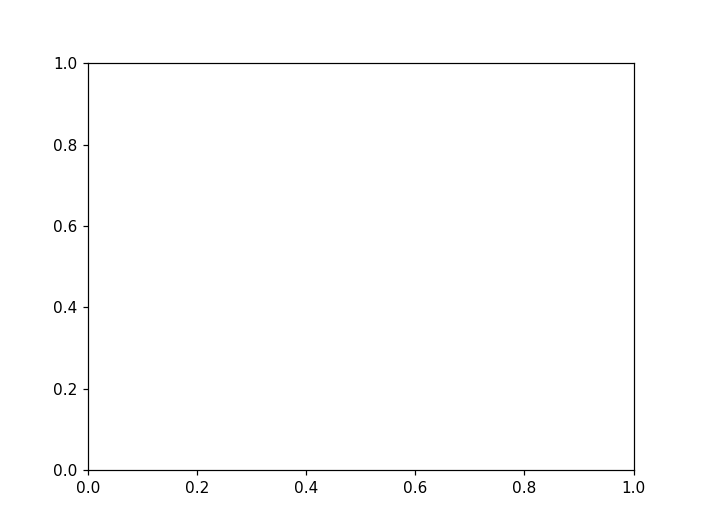

('kmeans iteration ', 1, 'of', 5)
Press enter to continue.
('kmeans iteration ', 2, 'of', 5)
Press enter to continue.
('kmeans iteration ', 3, 'of', 5)
Press enter to continue.
('kmeans iteration ', 4, 'of', 5)
Press enter to continue.
('kmeans iteration ', 5, 'of', 5)
Press enter to continue.


In [31]:
num_centroids = 16
max_iterations = 5

primary_centroids = init_centroids(img_data, num_centroids)
centroids, idx = kmeans(img_data, primary_centroids, max_iterations, plot_iterations=True)

Is there something different about the result when compared to the clustering output of the example in the previous section of the exercise?

Why is that? 

Increase the number of maximum iterations to 10 and then redo the clustering.

centroids:
[[0.7176471  0.58431375 0.36862746]
 [0.07843138 0.10196079 0.09019608]
 [0.12941177 0.16078432 0.10196079]
 [0.2901961  0.34509805 0.42352942]
 [0.85490197 0.7058824  0.44705883]
 [0.6392157  0.4509804  0.37254903]
 [0.77254903 0.6862745  0.4509804 ]
 [0.08235294 0.08627451 0.08235294]
 [0.10588235 0.10588235 0.08627451]
 [0.84313726 0.7176471  0.7490196 ]
 [0.19215687 0.20784314 0.24705882]
 [0.16470589 0.16470589 0.1882353 ]
 [0.08235294 0.09019608 0.05882353]
 [0.62352943 0.46666667 0.19215687]
 [0.654902   0.49411765 0.18431373]
 [0.09803922 0.10588235 0.10588235]]


<IPython.core.display.Javascript object>


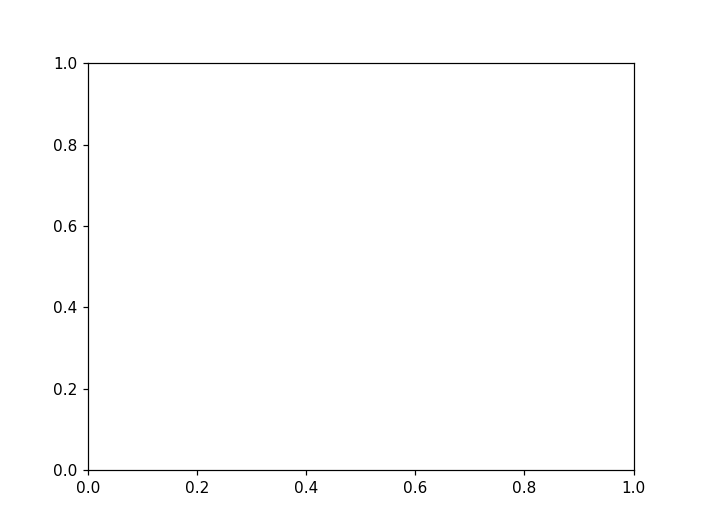

('kmeans iteration ', 1, 'of', 10)
Press enter to continue.
('kmeans iteration ', 2, 'of', 10)
Press enter to continue.
('kmeans iteration ', 3, 'of', 10)
Press enter to continue.
('kmeans iteration ', 4, 'of', 10)
Press enter to continue.
('kmeans iteration ', 5, 'of', 10)
Press enter to continue.
('kmeans iteration ', 6, 'of', 10)
Press enter to continue.
('kmeans iteration ', 7, 'of', 10)
Press enter to continue.
('kmeans iteration ', 8, 'of', 10)
Press enter to continue.
('kmeans iteration ', 9, 'of', 10)
Press enter to continue.
('kmeans iteration ', 10, 'of', 10)
Press enter to continue.


In [32]:
num_centroids = 16
max_iterations = 10

primary_centroids = init_centroids(img_data, num_centroids)
centroids, idx = kmeans(img_data, primary_centroids, max_iterations, plot_iterations=True)

As a result of the clustering performed in the previous step we should have centroids and the centroid_id assigned to each data point in our image data matrix.

Thus we have the 16 color with which we can represent the image. As the next step we assign each of these 16 colors(centroids) to each pixel in the image (sample in the dataset).

In [33]:
idx = assign_centroid(img_data, centroids)

As the last step we reconstruct the image based on the centroid assignment or as we can say color assignment to each pixel done in the image. We just repainted the image, now is the time to see the results.

One last `<to fill>` though!

In [34]:
idx = idx.astype(np.int64)
# repaint the image
img_data_reconstructed = centroids[idx]
# Reshape the image to proper RBG dimensions
img_repainted = np.reshape(img_data_reconstructed, (shape_img_data[0], shape_img_data[1], 3))

Let's see the original image, once more.

<IPython.core.display.Javascript object>


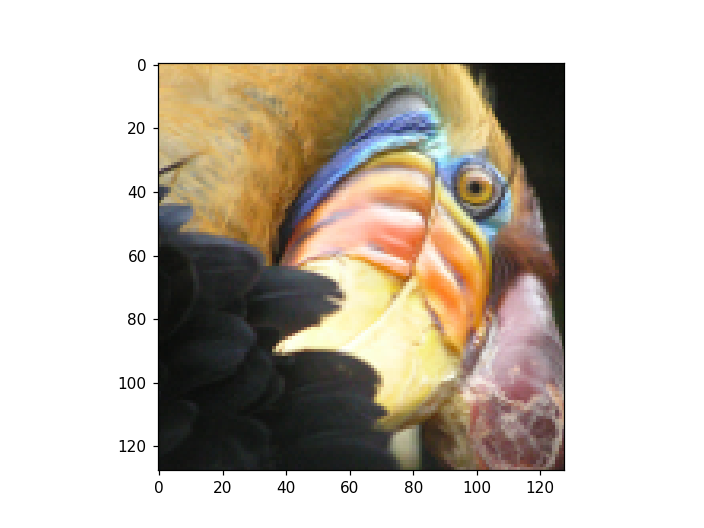

In [40]:
# Display the original image
img_plot = plt.imshow(img_data_orig)
plt.show()

Shut down the interectivity of the plot from previous step.

Now lets see the repainted/reconstructed image. :)

<IPython.core.display.Javascript object>


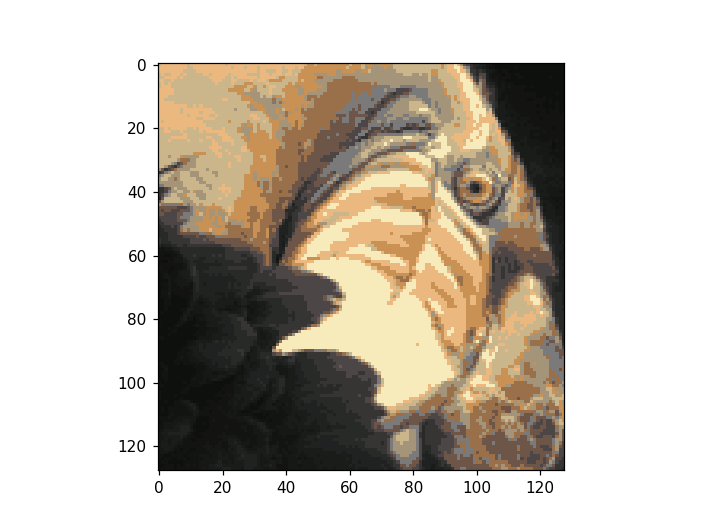

In [41]:
# Display the clustered image
img_plot2 = plt.imshow(img_repainted)
plt.show()

###### HW: Use one of your image with different dimensions to compress using the k-Means algorithm.

###### HW: Use other distance measures to the k-Means clustering algorithm to compute clusters.

###### HW: Add the support to plot real time cluster assignment for 3D data. At present our plotting only supports 2D data.

Happy Clustering!